<a href="https://colab.research.google.com/github/swleegit/ML_Quiz_sol/blob/main/Hong_198p_quiz_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.
[엑셀데이터](https://drive.google.com/file/d/1aSzAYCKGuW5w_oPr2puW1ATqTPf4PV-u/view?usp=sharing)  

(위의 엑셀파일은 열 이름을 삭제한 파일이다.)

1. 엑셀파일을 데이터프레임으로 불러오기(단, 첫 행이 열이름이 되지 않도록 하세요.)

2. 열이름을 다음과 같이 추가하세요.  
'Species', 'Weight','Length1','Length2','Length3','Height','Width'

3. Species중 가장 많은 종을 찾고 해당 종만 있도록 데이터프레임을 수정하세요.

4. Weight열을 target으로 'Length1','Length2','Length3','Height','Width'을 input으로 배열(ndarray)로 전환하세요.

5. 훈련과 테스트 데이터를 PolynomialFeatures를 이용하여 3제곱으로 특성을 늘려보세요.

6. 5.에서 몇개의 특성이 나왔나요? 어떤 조합으로 그런 특성이 나왔는지 생각해보세요

7. 늘어난 특성의 훈련세트와 테스트세트를 각각 정규화(표준점수로 반환)해보세요.
(mean, std를 이용해서 직접 해보세요)

8. 7.의 과정을 StandardScaler를 이용하여 해보세요. 그리고 7.의 결과와 비교해보세요.





# 1. 답

In [87]:
import pandas as pd
file_path = "/content/drive/MyDrive/혼공머신러닝/파일/Fish_excel.xlsx"
df = pd.read_excel(file_path, engine = 'openpyxl')
print(df.head())

   Bream    242  23.2  25.4    30    11.52    4.02
0  Bream  290.0  24.0  26.3  31.2  12.4800  4.3056
1  Bream  340.0  23.9  26.5  31.1  12.3778  4.6961
2  Bream  363.0  26.3  29.0  33.5  12.7300  4.4555
3  Bream  430.0  26.5  29.0  34.0  12.4440  5.1340
4  Bream  450.0  26.8  29.7  34.7  13.6024  4.9274


In [88]:
#default 설정값으로 첫 행이 열의 이름을 이루고 있음을 알 수 있다.
#header = None 이용하여 첫행이 열의 이름이 안되도록 하자.
file_path = "/content/drive/MyDrive/혼공머신러닝/파일/Fish_excel.xlsx"
df = pd.read_excel(file_path, engine = 'openpyxl', header = None)
print(df.head())

       0      1     2     3     4        5       6
0  Bream  242.0  23.2  25.4  30.0  11.5200  4.0200
1  Bream  290.0  24.0  26.3  31.2  12.4800  4.3056
2  Bream  340.0  23.9  26.5  31.1  12.3778  4.6961
3  Bream  363.0  26.3  29.0  33.5  12.7300  4.4555
4  Bream  430.0  26.5  29.0  34.0  12.4440  5.1340


In [89]:
#열의 이름을 바꾸자.
df.columns = ['Species', 'Weight','Length1','Length2','Length3','Height','Width']
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [90]:
#species의 각 고유값의 개수 파악
pd.value_counts(df['Species'])

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [91]:
#가장 많은 sample을 갖고 있는 Perch 샘플만 골라내자.
#해당 불리안 인덱스를 만들자.

perch_indexes = df['Species'] == 'Perch' #Perch면 True 아니면 False인 배열 생성
df.loc[perch_indexes]

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
79,Perch,80.0,17.2,19.0,20.2,5.6358,3.0502
80,Perch,85.0,17.8,19.6,20.8,5.1376,3.0368
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720


교재 185p랑 비교하자.  
교재는 ndarray(배열)을 대상으로 불리안 인덱싱을 했다.  
그래서 train_scaled[indexes]를 했다. ndarray[행,열]이기 때문이다.  
dataframe에서 열에 접근하려면 df[['열1','열2'...]] 또는 df[1:3]  
행에 접근하려면 df.loc[['행1','행2']] 또는 df.iloc[[0,1]]  
행,열에 접근하려면 df.loc[['행1,'행2'],['열1','열2']] (iloc도 마찬가지)

In [92]:
#target인 weight와 input인 weight1,2,3,height, width를 넘파이 배열로 변환하자.

perch_target = df['Weight'].to_numpy()
perch_input = df[['Length1','Length2','Length3','Height','Width']].to_numpy()

In [93]:
#훈련세트와 테스트세트로 나누자.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(perch_input, perch_target, random_state = 42)
#stratify = perch_target 안됨. 분류문제에서만 가능하다.


In [94]:
#변환기인 PolynomialFeatures를(3제곱) 이용해서 input데이터의 특성을 늘려보자.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = False).fit(train_input)
ptrain_input = poly.transform(train_input)
ptest_input = poly.transform(test_input)
ptrain_input.shape

(119, 55)

In [95]:
poly.get_feature_names_out()
#3제곱 의미
#1 : 특성 단독
#2 : 두개의 특성(중복허용)
#3 : 3개의 특성(중복허용)
#모두 합해서 총 55개의 경우의 수

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3',
       'x0 x4', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x2^2', 'x2 x3',
       'x2 x4', 'x3^2', 'x3 x4', 'x4^2', 'x0^3', 'x0^2 x1', 'x0^2 x2',
       'x0^2 x3', 'x0^2 x4', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3',
       'x0 x1 x4', 'x0 x2^2', 'x0 x2 x3', 'x0 x2 x4', 'x0 x3^2',
       'x0 x3 x4', 'x0 x4^2', 'x1^3', 'x1^2 x2', 'x1^2 x3', 'x1^2 x4',
       'x1 x2^2', 'x1 x2 x3', 'x1 x2 x4', 'x1 x3^2', 'x1 x3 x4',
       'x1 x4^2', 'x2^3', 'x2^2 x3', 'x2^2 x4', 'x2 x3^2', 'x2 x3 x4',
       'x2 x4^2', 'x3^3', 'x3^2 x4', 'x3 x4^2', 'x4^3'], dtype=object)

In [96]:
#직접 각 열의 scale을 조정하는 정규화 작업을 하자.
#각 열의 평균과 표준편차를 구하자.
#정규화는 반드시! 훈련 세트를 기준으로 한다.

import numpy as np
mean = np.mean(ptrain_input, axis = 0)
std = np.std(ptrain_input, axis = 0)

print(mean)
print("\n")
print(std)

[2.63243697e+01 2.84966387e+01 3.12697479e+01 8.86248403e+00
 4.44828655e+00 7.92411933e+02 8.56524454e+02 9.37086134e+02
 2.57814471e+02 1.31138888e+02 9.25932689e+02 1.01322941e+03
 2.79395907e+02 1.41884859e+02 1.11034563e+03 3.08968937e+02
 1.55486346e+02 9.49414117e+01 4.46205259e+01 2.24784019e+01
 2.67547802e+04 2.88723198e+04 3.14612865e+04 8.21421819e+03
 4.27988357e+03 3.11605916e+04 3.39621773e+04 8.88976346e+03
 4.62352708e+03 3.70647882e+04 9.79650737e+03 5.04894786e+03
 2.91615045e+03 1.39363057e+03 7.15184216e+02 3.36336313e+04
 3.66656499e+04 9.62193486e+03 4.99528651e+03 4.00244094e+04
 1.06062102e+04 5.45616093e+03 3.16432467e+03 1.50943689e+03
 7.73251048e+02 4.37510736e+04 1.17102719e+04 5.96807786e+03
 3.52778546e+03 1.66610762e+03 8.45631606e+02 1.15985600e+03
 5.13257749e+02 2.43561282e+02 1.23954730e+02]


[9.97193513e+00 1.06711890e+01 1.15129708e+01 4.04941829e+00
 1.64047206e+00 6.09157398e+02 6.52897332e+02 6.99439320e+02
 1.70338657e+02 8.64808366e+01 6.998

In [97]:
#브로드캐스팅 기능을 활용해서 훈련세트와 테스트세트를 정규화하자.
rph_train_input = (ptrain_input - mean) / std
rph_test_input = (ptest_input - mean) / std

print(rph_train_input)
print('\n')
print(rph_test_input)


[[ 0.56916037  0.60943175  0.81041221 ...  2.14000854  1.64702138
   0.88014891]
 [ 1.57197475  1.54653445  1.45316551 ... -0.52890238 -0.34786205
  -0.05694495]
 [-1.63703128 -1.68646987 -1.70848587 ... -0.97460842 -1.09225571
  -1.05703952]
 ...
 [ 0.30842863  0.32830094  0.51509312 ...  1.23200743  0.70854732
   0.12348159]
 [-0.58407618 -0.56194663 -0.63143979 ... -0.66298325 -0.69985263
  -0.6594685 ]
 [-0.11275342 -0.11213733 -0.22320459 ... -0.30150317 -0.10836924
   0.10042492]]


[[-0.9551175  -0.91804565 -1.03098914 ... -0.82150578 -0.87431969
  -0.80736327]
 [-1.46655284 -1.50842035 -1.54345461 ... -0.96889516 -1.08654454
  -1.05287116]
 [ 0.36859749  0.35641402  0.30663259 ... -0.78276697 -0.81662971
  -0.73833149]
 ...
 [-0.69438576 -0.70251203 -0.65749736 ... -0.74729592 -0.80342419
  -0.76175994]
 [-0.65427318 -0.6556569  -0.62275394 ... -0.40990828 -0.66429067
  -0.79875302]
 [ 1.03045498  0.98427283  0.8712132  ...  1.19311445  1.94171549
   2.36064693]]


In [98]:
#이번에는 변환기 StandardScaler을 이용하자.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(ptrain_input)
print(ss.mean_)
print("\n")
print(ss.scale_)

[2.63243697e+01 2.84966387e+01 3.12697479e+01 8.86248403e+00
 4.44828655e+00 7.92411933e+02 8.56524454e+02 9.37086134e+02
 2.57814471e+02 1.31138888e+02 9.25932689e+02 1.01322941e+03
 2.79395907e+02 1.41884859e+02 1.11034563e+03 3.08968937e+02
 1.55486346e+02 9.49414117e+01 4.46205259e+01 2.24784019e+01
 2.67547802e+04 2.88723198e+04 3.14612865e+04 8.21421819e+03
 4.27988357e+03 3.11605916e+04 3.39621773e+04 8.88976346e+03
 4.62352708e+03 3.70647882e+04 9.79650737e+03 5.04894786e+03
 2.91615045e+03 1.39363057e+03 7.15184216e+02 3.36336313e+04
 3.66656499e+04 9.62193486e+03 4.99528651e+03 4.00244094e+04
 1.06062102e+04 5.45616093e+03 3.16432467e+03 1.50943689e+03
 7.73251048e+02 4.37510736e+04 1.17102719e+04 5.96807786e+03
 3.52778546e+03 1.66610762e+03 8.45631606e+02 1.15985600e+03
 5.13257749e+02 2.43561282e+02 1.23954730e+02]


[9.97193513e+00 1.06711890e+01 1.15129708e+01 4.04941829e+00
 1.64047206e+00 6.09157398e+02 6.52897332e+02 6.99439320e+02
 1.70338657e+02 8.64808366e+01 6.998

In [99]:
rp_train_input = ss.transform(ptrain_input)
rp_test_input = ss.transform(ptest_input)

print(rp_train_input)
print("\n")
print(rp_test_input)

[[ 0.56916037  0.60943175  0.81041221 ...  2.14000854  1.64702138
   0.88014891]
 [ 1.57197475  1.54653445  1.45316551 ... -0.52890238 -0.34786205
  -0.05694495]
 [-1.63703128 -1.68646987 -1.70848587 ... -0.97460842 -1.09225571
  -1.05703952]
 ...
 [ 0.30842863  0.32830094  0.51509312 ...  1.23200743  0.70854732
   0.12348159]
 [-0.58407618 -0.56194663 -0.63143979 ... -0.66298325 -0.69985263
  -0.6594685 ]
 [-0.11275342 -0.11213733 -0.22320459 ... -0.30150317 -0.10836924
   0.10042492]]


[[-0.9551175  -0.91804565 -1.03098914 ... -0.82150578 -0.87431969
  -0.80736327]
 [-1.46655284 -1.50842035 -1.54345461 ... -0.96889516 -1.08654454
  -1.05287116]
 [ 0.36859749  0.35641402  0.30663259 ... -0.78276697 -0.81662971
  -0.73833149]
 ...
 [-0.69438576 -0.70251203 -0.65749736 ... -0.74729592 -0.80342419
  -0.76175994]
 [-0.65427318 -0.6556569  -0.62275394 ... -0.40990828 -0.66429067
  -0.79875302]
 [ 1.03045498  0.98427283  0.8712132  ...  1.19311445  1.94171549
   2.36064693]]


# 2.
0.001로 시작해서 10배씩 커지고 원소가 100개인 리스트를 만들어보세요.  
한줄로 만들어보세요.

# 답

In [100]:
alpha_list = [0.001 * 10 ** n for n in range(100)]
alpha_list

[0.001,
 0.01,
 0.1,
 1.0,
 10.0,
 100.0,
 1000.0,
 10000.0,
 100000.0,
 1000000.0,
 10000000.0,
 100000000.0,
 1000000000.0,
 10000000000.0,
 100000000000.0,
 1000000000000.0,
 10000000000000.0,
 100000000000000.0,
 1000000000000000.0,
 1e+16,
 1e+17,
 1e+18,
 1e+19,
 1e+20,
 1e+21,
 1.0000000000000002e+22,
 1.0000000000000001e+23,
 1e+24,
 9.999999999999999e+24,
 9.999999999999999e+25,
 1e+27,
 1e+28,
 1.0000000000000001e+29,
 1e+30,
 1e+31,
 1e+32,
 1.0000000000000001e+33,
 1e+34,
 1e+35,
 9.999999999999999e+35,
 1.0000000000000001e+37,
 1e+38,
 1.0000000000000001e+39,
 1e+40,
 1.0000000000000002e+41,
 9.999999999999999e+41,
 1e+43,
 1e+44,
 1.0000000000000001e+45,
 1e+46,
 1e+47,
 1e+48,
 1.0000000000000001e+49,
 1e+50,
 1.0000000000000002e+51,
 1e+52,
 1.0000000000000002e+53,
 1e+54,
 1e+55,
 1e+56,
 1e+57,
 1e+58,
 1.0000000000000001e+59,
 1.0000000000000001e+60,
 1.0000000000000001e+61,
 1e+62,
 9.999999999999999e+62,
 1e+64,
 1e+65,
 1.0000000000000001e+66,
 1.0000000000000001e

# 3.
https://bit.ly/fish_csv_data

로지스틱회귀를 이용해서 bream에 대한 z 값을 구해보세요.  

1. 해당링크파일을 데이터프레임으로 전환

2. bream과 smelt만 가져오기
3. 클래스 bream을 1(양성), smelt를 0(음성)으로 대체
4. target값과 input 값 배열로 전환 
5. 훈련 테스트 세트 분할
6. 정규화
7. 로지스틱회귀 모델링
8. test 5개 샘플에 대한 z 값 추출 


## 답. 방법1

In [101]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [102]:
#Species 값 확인 
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [103]:
#Bream과 Smelt만 가져오자.
bream_smelt_indexes = (fish['Species'] == 'Bream') | (fish['Species'] == 'Smelt')
fish_1= fish.loc[bream_smelt_indexes]
fish_1.head(-10)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [104]:
#사이킷런에서 클래스는 알파벳 순서로 정렬되기 때문에
#그냥 하면 smelt가 양성이 된다.
#bream을 양성으로 하기위해서 bream을 1, smelt를 0으로 대체하자.

fish_1 = fish_1.replace({'Species' : 'Bream'}, 1)
fish_1 = fish_1.replace({'Species' : 'Smelt'}, 0)
fish_1.head(-10)

,Species,Weight,Length,Diagonal,Height,Width
0,1,242.0,25.4,30.0,11.5200,4.0200
1,1,290.0,26.3,31.2,12.4800,4.3056
2,1,340.0,26.5,31.1,12.3778,4.6961
3,1,363.0,29.0,33.5,12.7300,4.4555
4,1,430.0,29.0,34.0,12.4440,5.1340
5,1,450.0,29.7,34.7,13.6024,4.9274
6,1,500.0,29.7,34.5,14.1795,5.2785
7,1,390.0,30.0,35.0,12.6700,4.6900
8,1,450.0,30.0,35.1,14.0049,4.8438
9,1,500.0,30.7,36.2,14.2266,4.9594


In [105]:
#target과 input값을 뽑자.
fish_target = fish_1['Species'].to_numpy()
fish_input = fish_1[['Weight','Length',	'Diagonal',	'Height',	'Width']].to_numpy()


In [106]:
#훈련세트와 테스트 세트로 분할 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(fish_input, fish_target, stratify = fish_target, random_state = 42)



In [107]:
#훈련세트 기준으로 정규화(규제를 적용하지 않기에 반드시 필요한 과정은 아니다.)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [125]:
#로지스틱회귀 모델링 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(train_scaled, train_target)
print(lr.classes_)

[0 1]


In [126]:
#양성클래스(1 = Bream)에 대한 z 값 확인
print(lr.decision_function(test_scaled[:5]))

[-3.24728537 -3.19252119  3.54387056 -3.14501783  2.58955402]


## 답. 방법2

- 앞에 fish_1에서 1을 bream으로 0을 smelt로 바꾸자  
즉 0과 1 로 바꾸기 전으로 돌아간다는 뜻
- 이렇게 하면 알파벳 순서로 smelt가 양성이됨.
- 여기서 구한 z 는 smelt에 대한 z로 bream에 대한 z를 얻기위해 수식변형을 하자.

In [118]:
#앞의 train_target 배열에서 0을 smelt로 1을 bream으로 바꾸면 됨
#점수를 확인하는 거라면 test_target도 바꿔야하지만
#여기서는 훈련세트로 학습하고 테스트 샘플에 대한 z 값만 얻는 것이니
#test_target은 바꿀 필요없다.

print(train_target)


[1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1]


In [121]:
import numpy as np 
train_target_bs = np.where(train_target == 0, 'Smelt', 'Bream')
#np.where(조건, 조건이 참인 경우, 조건이 거짓인 경우)
#변수로 받아야한다.

In [123]:
#로지스틱 회귀 모델링
from sklearn.linear_model import LogisticRegression
lr_bs = LogisticRegression().fit(train_scaled, train_target_bs)
print(lr.classes_)

['Bream' 'Smelt']


In [124]:
#smelt가 양성인 경우 z 값
print(lr_bs.decision_function(test_scaled[:5]))

[ 3.24728537  3.19252119 -3.54387056  3.14501783 -2.58955402]


In [127]:
#bream이 양성인 경우 z 값 
print(lr.decision_function(test_scaled[:5]))

[-3.24728537 -3.19252119  3.54387056 -3.14501783  2.58955402]


<img src = "https://drive.google.com/uc?id=1k-Z5SDesmyASFgXshw4HXv_oqFBSlqiu">



# 4.
from sklearn.datasets import load_breast_cancer을 이용하여 데이터를 가져오고 로지스틱회귀에서 최적의 C값을 찾아보세요.

- C_list = [0.001, 0.01, 0.1, 1, 10, 100]

# 답


In [129]:
#데이터 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(type(cancer)) #bunch 자료형 , 딕셔너리와 유사함.
print("\n")
print(cancer)

<class 'sklearn.utils.Bunch'>


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [133]:
#훈련, 테스트 세트 분할 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)


In [149]:
#C_list, 점수 리스트
C_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

In [150]:
#C 값에 따른 로지스틱 회귀 학습 
from sklearn.linear_model import LogisticRegression

for C in C_list:
  #학습 
  lr = LogisticRegression(C = C, max_iter = 5000)
  lr.fit(train_input, train_target)

  #훈련, 테스트 세트 점수
  train_score.append(lr.score(train_input, train_target))
  test_score.append(lr.score(test_input, test_target))


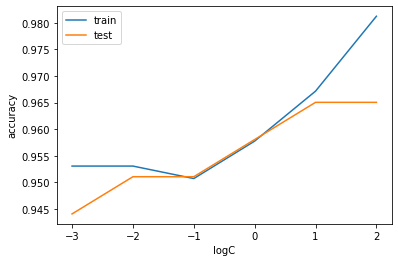

In [152]:
#스케일 조정을 위해 C값(X축) 상용로그 취하자.
import numpy as np
c_log = np.log10(C_list)

#그래프 그리기
import matplotlib.pyplot as plt 

plt.plot(c_log, train_score, label = 'train')
plt.plot(c_log, test_score, label = 'test')
plt.xlabel('logC')
plt.ylabel('accuracy')
plt.legend(loc = 'best')
plt.show()

# 5.
- 양성(여기서는 암이 악성)을 결정짓는 특성을 찾아보세요.

# 답  
접근방법
- 규제의 세기를 조절하여 각 계수의 부호 변화를 확인하여, 일관되게 양수인 계수를 갖는 특성은 악성을 결정과 연관된 특성으로 생각할 수 있다.

In [164]:
#C = 0.01 ,1, 100에 대한 계수를 얻어보자.

#C = 0.01
lr0001 = LogisticRegression(C = 0.001, max_iter = 5000)
lr0001.fit(train_input, train_target)

#C = 1

lr1 = LogisticRegression(max_iter = 5000)
lr1.fit(train_input, train_target)

#C = 100

lr100 = LogisticRegression(C = 100 , max_iter = 5000)
lr100.fit(train_input, train_target)


LogisticRegression(C=100, max_iter=5000)

(-1.4500000000000002, 30.45)


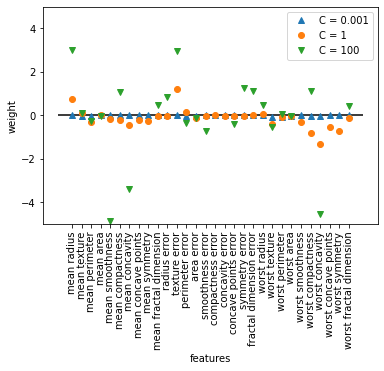

In [166]:
#3가지 모델에 대한 계수의 분포를 확인해보자.

plt.plot(lr0001.coef_.T, "^", label = 'C = 0.001')
plt.plot(lr1.coef_.T, "o", label = 'C = 1')
plt.plot(lr100.coef_.T, "v", label = 'C = 100')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.ylim(-5,5)
plt.xlabel('features')
plt.ylabel('weight')
plt.legend()
print(xlims)

- mean perimeter는 c 값에 따라 계수가 양수 또는 음수
- 즉 양성/음성 신호 모두 될 수 있음.

- 반면 texture error은 c값이 변해도 양수임. 이는 음성 또는 양성신호 둘중 하나라고 생각할 수 있다.

- texture error 특성 값들이 음수라면 w가 양수니 z값에 음수영향, 즉 음성신호로 생각할 수 있음.

- 따라서 texture error의 부호를 확인해 볼 필요가 있다.

In [167]:
#texture error은 몇번째 열?
feature_names = cancer.feature_names
print(feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [169]:
#numpy에서 원소 인덱스 찾기
np.where(feature_names == 'texture error')

(array([11]),)

(569,)


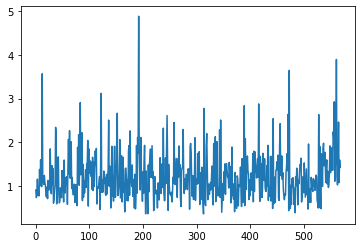

In [173]:
#11(12번째 열)에 있음.
#그래프를 그려서 확인하자.
print(cancer.data[:,11].shape)
plt.plot(cancer.data[:,11])
#모두 양수임을 알 수 있다.